## Generator

In [0]:
from tensorflow.keras.layers import Embedding, Flatten, Reshape, Dense, Concatenate, Conv2DTranspose, BatchNormalization, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [0]:
?Reshape

In [0]:
# define the generator model
# 
# Reference - Paper : https://arxiv.org/pdf/1610.09585.pdf
# Also refer to GAN hacks - https://github.com/soumith/ganhacks
#
# For ACGAN:
#     inputs: label and noise (latent dimension)
#     ouput:  fake-image
#
# noise of size 8x8 -> 16x16 -> 32x32 -> 64x64
# label is also modeled as 8x8 - yet another channel along with noise
#
# Use ReLu instead of LeakyReLu for ACGAN - for more info refer to paper.
#
def generator(latent_dim, n_classes=2):

  # Input 1 - label - one dim tensor
  img_class = Input(shape=(1,))
  # use embedding for  input
  emb = Embedding(n_classes, latent_dim)(img_class)

  # setup the label as yet another channel along with noise
  n_nodes = 8 * 8
  label_in = Dense(n_nodes)(emb)
  # reshape it
  label_in = Reshape((8,8,1))(label_in)


  # Input 2 - noise
  latent_input = Input(shape=(latent_dim,))
  # foundation of noise input for image
  # refer to page 11 of the above mentioned paper for all these feature map count
  n_nodes = 398 * 8 * 8
  gen = Dense(n_nodes)(latent_input)
  gen = Activation('relu')(gen)
  gen = Reshape((8,8,398))(gen)

  # combine inputs : noise + label
  inp_merge = Concatenate()([gen, label_in])

  # upsample to 16x16
  gen = Conv2DTranspose(256, (5,5), strides=(2,2), padding='same')(inp_merge)
  gen = BatchNormalization()(gen)
  gen = Activation('relu')(gen)

  # upsample to 32x32
  gen = Conv2DTranspose(192, (5,5), strides=(2,2), padding='same')(gen)
  gen = BatchNormalization()(gen)
  gen = Activation('relu')(gen)

  # upsample to 64x64
  gen = Conv2DTranspose(3, (5,5), strides=(2,2), padding='same')(gen)
  # No BN - refer to page 11 of the above mentioned paper.

  # output
  out_layer = Activation('tanh')(gen)

  # define model
  model = Model([latent_input, img_class], out_layer)

  return model


In [0]:
latent_dim = 100
model_gen = generator(latent_dim)

In [10]:
model_gen.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 25472)        2572672     input_6[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 100)       200         input_5[0][0]                    
____________________________________________________________________________________________

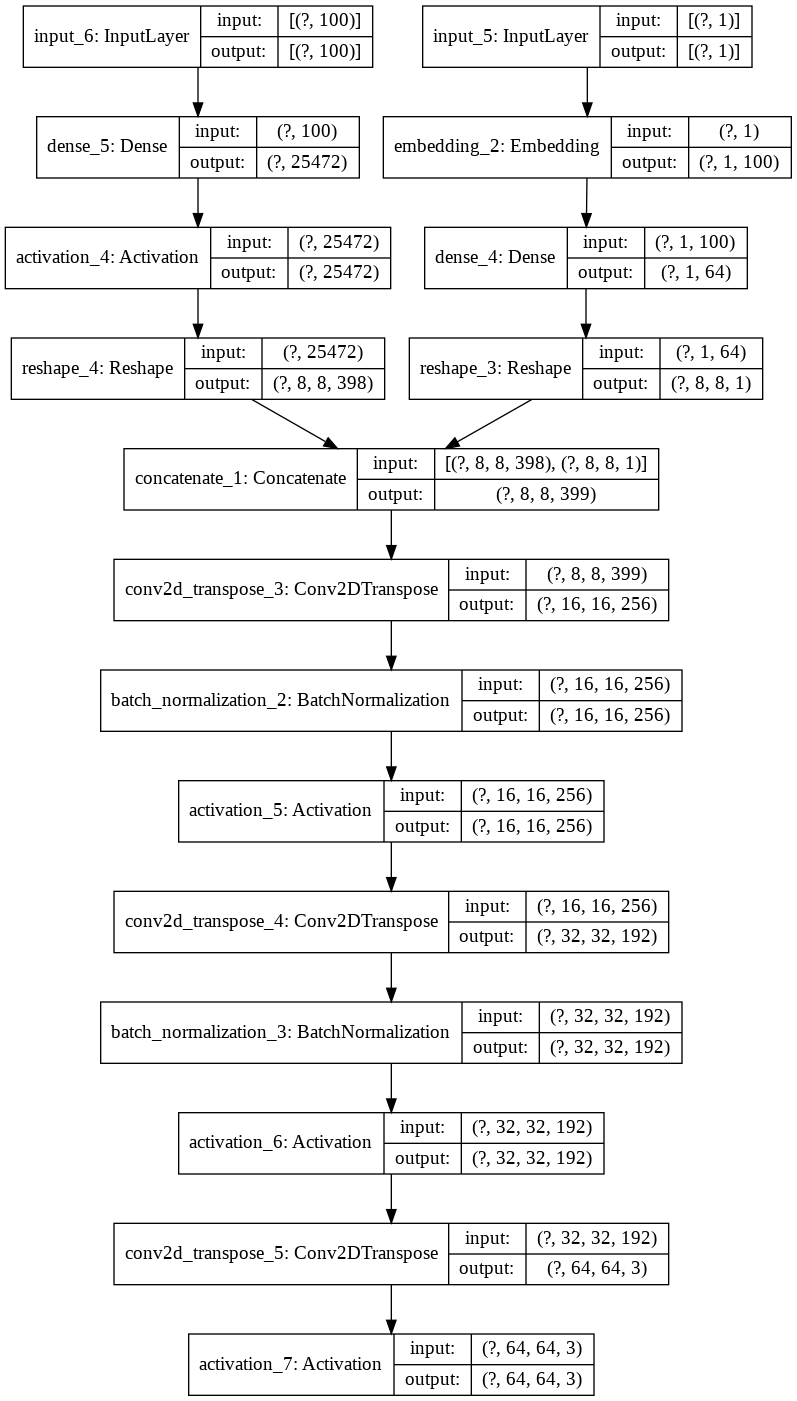

In [13]:
# plot the model
plot_model(model_gen, to_file= 'generator_plot.png' , show_shapes=True, show_layer_names=True)